<a href="https://colab.research.google.com/github/cwilbar04/nba-predictions/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.cloud import bigquery
from datetime import datetime
import os

In [9]:
# from google.colab import auth
# auth.authenticate_user()
# print('Authenticated')

In [18]:
my_project_id = 'nba-predictions-dev'
model_table_name = 'nba.model_game'

In [11]:
%env GOOGLE_APPLICATION_CREDENTIALS C:\GCP\nba-predictions-dev-d76075f0a064.json

env: GOOGLE_APPLICATION_CREDENTIALS=C:\GCP\nba-predictions-dev-d76075f0a064.json


In [12]:
%env GOOGLE_CLOUD_PROJECT nba-predictions-dev

env: GOOGLE_CLOUD_PROJECT=nba-predictions-dev


In [13]:
credentials = os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')

In [14]:
client = bigquery.Client(project=my_project_id)

In [23]:
model = client.query('''
  SELECT
    *
  FROM
    `%s`
''' % (model_table_name)).to_dataframe()

In [24]:
model.describe()

,season,is_home_team,spread,pace,efg_pct,tov_pct,ft_rate,off_rtg,opponent_efg_pct,opponent_tov_pct,...,wma_10_opponent_off_rtg,incoming_wma_10_opponent_off_rtg,wma_10_starter_minutes_played_proportion,incoming_wma_10_starter_minutes_played_proportion,wma_10_bench_plus_minus,incoming_wma_10_bench_plus_minus,wma_10_opponnent_starter_minutes_played_proportion,incoming_wma_10_opponnent_starter_minutes_played_proportion,wma_10_opponent_bench_plus_minus,incoming_wma_10_opponent_bench_plus_minus
count,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,...,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000
mean,2015.255864,0.499940,0.010531,96.393149,0.513459,12.535675,0.210367,109.034753,0.513367,12.533569,...,108.968268,108.949749,0.627816,0.627826,-1.906938,-1.909768,0.627755,0.627758,-1.949866,-1.949067
std,6.749800,0.500015,14.123429,5.690357,0.066731,3.484401,0.080066,11.629726,0.066792,3.481998,...,5.563451,5.563415,0.049122,0.049172,16.515124,16.513873,0.034208,0.034223,16.246417,16.243929
min,2000.000000,0.000000,-61.000000,72.600000,0.278000,1.000000,0.011000,65.300000,0.278000,1.000000,...,88.816364,88.816364,0.461068,0.461068,-135.309091,-135.309091,0.485263,0.485263,-85.200000,-85.200000
25%,2016.000000,0.000000,-9.000000,92.500000,0.467000,10.100000,0.154000,101.200000,0.467000,10.100000,...,105.287273,105.263636,0.594762,0.594754,-11.709091,-11.709091,0.604823,0.604809,-11.459091,-11.454545
50%,2018.000000,0.000000,1.000000,96.400000,0.512000,12.400000,0.202000,109.000000,0.512000,12.400000,...,109.092727,109.064545,0.626316,0.626303,-2.100000,-2.109091,0.626088,0.626096,-2.236364,-2.236364
75%,2019.000000,1.000000,9.000000,100.200000,0.558000,14.800000,0.259000,116.900000,0.558000,14.800000,...,112.787273,112.776818,0.659921,0.659931,7.672727,7.659091,0.648620,0.648595,7.531818,7.527273
max,2021.000000,1.000000,61.000000,117.200000,0.762000,27.800000,0.683000,154.000000,0.762000,27.800000,...,132.240000,132.240000,0.817108,0.817108,86.618182,86.618182,0.775327,0.775327,122.945455,122.945455


In [25]:
model.head()

,game_key,season,game_date,team,opponent,is_home_team,spread,pace,efg_pct,tov_pct,...,wma_10_opponent_off_rtg,incoming_wma_10_opponent_off_rtg,wma_10_starter_minutes_played_proportion,incoming_wma_10_starter_minutes_played_proportion,wma_10_bench_plus_minus,incoming_wma_10_bench_plus_minus,wma_10_opponnent_starter_minutes_played_proportion,incoming_wma_10_opponnent_starter_minutes_played_proportion,wma_10_opponent_bench_plus_minus,incoming_wma_10_opponent_bench_plus_minus
0,IND20160426TOR600pa,2016,2016-04-26,Indiana Pacers,Toronto Raptors,0,-3,88.0,0.541,14.4,...,105.625455,103.514545,0.592034,0.570271,-7.200000,1.527273,0.577735,0.564633,4.963636,-3.963636
1,BOS20160426ATL830pa,2016,2016-04-26,Boston Celtics,Atlanta Hawks,0,-27,97.4,0.422,18.5,...,103.274545,101.389091,0.594357,0.604949,-2.181818,5.927273,0.657590,0.684604,-6.509091,-20.509091
2,BOS20160426ATL830ph,2016,2016-04-26,Atlanta Hawks,Boston Celtics,1,27,97.4,0.510,10.4,...,96.940000,99.354545,0.655408,0.685989,-4.345455,-19.527273,0.620607,0.641633,-8.036364,-1.309091
3,IND20160426TOR600ph,2016,2016-04-26,Toronto Raptors,Indiana Pacers,1,3,88.0,0.439,6.7,...,105.587273,103.954545,0.598875,0.591151,17.436364,12.454545,0.608726,0.595895,-20.054545,-16.254545
4,MIA20161125MEM800pa,2017,2016-11-25,Miami Heat,Memphis Grizzlies,0,9,88.9,0.459,7.9,...,103.141818,105.609091,0.579275,0.586230,0.745455,3.236364,0.602691,0.612428,-4.127273,-7.927273


In [43]:
model.columns.sort_values()

Index(['bench_plus_minus', 'efg_pct', 'ft_rate', 'game_date', 'game_key',
       'incoming_is_win_streak', 'incoming_wma_10_bench_plus_minus',
       'incoming_wma_10_efg_pct', 'incoming_wma_10_ft_rate',
       'incoming_wma_10_off_rtg', 'incoming_wma_10_opponent_bench_plus_minus',
       'incoming_wma_10_opponent_efg_pct', 'incoming_wma_10_opponent_ft_rate',
       'incoming_wma_10_opponent_off_rtg', 'incoming_wma_10_opponent_tov_pct',
       'incoming_wma_10_opponnent_starter_minutes_played_proportion',
       'incoming_wma_10_pace',
       'incoming_wma_10_starter_minutes_played_proportion',
       'incoming_wma_10_tov_pct', 'is_home_team', 'is_win', 'off_rtg',
       'opponent', 'opponent_bench_plus_minus', 'opponent_efg_pct',
       'opponent_ft_rate', 'opponent_off_rtg', 'opponent_tov_pct',
       'opponnent_starter_minutes_played_proportion', 'pace', 'season',
       'spread', 'starter_minutes_played_proportion', 'streak_counter_is_win',
       'team', 'tov_pct', 'wma_10_bench_p

In [45]:
model_included = model[['spread','incoming_is_win_streak', 'incoming_wma_10_bench_plus_minus',
       'incoming_wma_10_efg_pct', 'incoming_wma_10_ft_rate',
       'incoming_wma_10_off_rtg', 'incoming_wma_10_opponent_bench_plus_minus',
       'incoming_wma_10_opponent_efg_pct', 'incoming_wma_10_opponent_ft_rate',
       'incoming_wma_10_opponent_off_rtg', 'incoming_wma_10_opponent_tov_pct',
       'incoming_wma_10_opponnent_starter_minutes_played_proportion',
       'incoming_wma_10_pace',
       'incoming_wma_10_starter_minutes_played_proportion',
       'incoming_wma_10_tov_pct', 'is_home_team']]

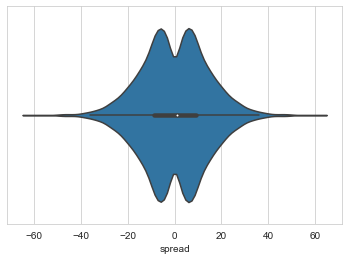

In [46]:
sns.set_style("whitegrid")
ax = sns.violinplot(data=model_included, x='spread', inner='box', orient='h')

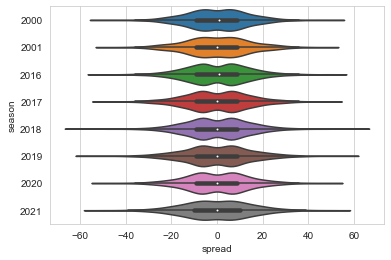

In [40]:
ax = sns.violinplot(data=model, x='spread', y='season', inner='box', orient='h')